In [1]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

pd.options.display.max_columns = 40
pd.options.display.max_rows = 85

In [28]:
df_train = pd.read_csv('../Данные Для Модели/WORK_bank_data_train.csv', encoding='cp1251', engine='python', sep=';', index_col=None, header=0)
df_train

,ID,Age,Ind_Household,Age_group,District,Region,Lifetime,Income,Segment,Ind_deposit,Ind_email,Ind_phone,Ind_salary,trans_6_month,trans_9_month,trans_12_month,amont_trans,amont_day_from,trans_3_month,Gender,Target1,Target2
0,1200000001,51.0,No,middle,02,Midlands,3.0,53,Platinum,No,Yes,Yes,No,2026.27,2964.23,4140.91,3,21,910.02,F,No,No
1,1200000002,47.0,No,middle,34,Midlands,2.0,51,Gold,No,Yes,Yes,No,2033.14,2969.30,4202.63,5,14,977.80,U,No,No
2,1200000003,45.0,No,middle,17,North,6.0,50,Silver,No,Yes,Yes,No,2085.68,3080.13,4277.45,11,16,1001.54,M,No,No
3,1200000004,78.0,No,senior,49,Midlands,12.0,52,Platinum,Yes,Yes,Yes,No,2026.58,3001.34,4105.54,3,15,980.78,F,No,No
4,1200000005,57.0,No,middle,19,South East,8.0,52,Silver,Yes,Yes,Yes,No,2142.23,3188.19,4401.98,2,26,1003.68,F,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985472,1201048571,NaN,No,unknown,12,South East,6.0,42,Silver,Yes,Yes,Yes,No,2139.03,3155.41,4291.97,10,14,989.90,F,No,No
985473,1201048572,63.0,No,senior,33,South East,9.0,51,Tin,No,Yes,Yes,No,1916.91,3000.02,4045.15,11,30,884.63,F,No,No
985474,1201048573,68.0,No,senior,51,North,3.0,56,Gold,Yes,Yes,Yes,No,2053.00,3112.87,4292.20,8,16,922.66,M,No,No
985475,1201048574,45.0,No,middle,45,Midlands,1.0,54,Gold,Yes,Yes,Yes,No,2082.85,3143.77,4207.48,8,15,951.42,M,No,No


In [29]:
df_test = pd.read_csv('../Данные Для Модели/WORK_WORK_BANK_DATA_test_sample.csv', encoding='cp1251', engine='python', sep=';', index_col=None, header=0)
df_test

,ID,Age,Ind_House_hold,Age_group,District,Region,Lifetime,Income,Segment,Ind_deposit,Ind_salary,trans_6_month,trans_9_month,trans_12_month,amont_trans,amont_day_from,trans_3_month,Gender
0,1200000027,50.0,No,middle,22,South East,5.0,47,Tin,Yes,No,2062.32,2978.92,4054.13,7,17,950.45,M
1,1200000040,34.0,No,middle,47,South East,5.0,54,Tin,No,No,2000.73,3111.23,4265.02,5,17,982.29,F
2,1200000041,NaN,Yes,unknown,14,South East,28.0,52,Gold,Yes,No,1991.05,2990.26,4193.14,9,33,909.27,F
3,1200000071,61.0,No,senior,23,Midlands,3.0,54,Silver,Yes,No,2094.12,3089.97,4167.11,5,17,933.91,F
4,1200000080,44.0,No,middle,51,North,8.0,43,Silver,Yes,No,2034.41,2972.27,4165.87,5,17,917.13,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63093,1201048525,67.0,Yes,senior,45,Midlands,1.0,48,Silver,Yes,No,2037.32,3084.48,4236.37,12,33,904.46,M
63094,1201048529,75.0,No,senior,14,Midlands,9.0,46,Tin,Yes,No,2048.42,3072.78,4203.52,7,17,1026.79,F
63095,1201048544,54.0,No,middle,04,Midlands,2.0,53,Gold,Yes,No,2120.81,3167.97,4343.64,16,17,1017.48,U
63096,1201048557,41.0,Yes,middle,27,South West,13.0,44,Tin,Yes,No,2133.01,3201.82,4284.59,12,17,979.36,F


In [30]:
for column_train in df_train.columns:
    was = False
    for column_test in df_test.columns:
        if column_train == column_test:
            was = True
    if not was:
        print(column_train)

Ind_Household
Ind_email
Ind_phone
Target1
Target2


Смотрим количество пропущенных значений

In [4]:
df_train.isna().sum()

ID                    0
Age               66958
Ind_Household         0
Age_group             0
District              0
Region                0
Lifetime          12608
Income                0
Segment               0
Ind_deposit           0
Ind_email             0
Ind_phone             0
Ind_salary            0
trans_6_month         0
trans_9_month         0
trans_12_month        0
amont_trans           0
amont_day_from        0
trans_3_month         0
Gender                0
Target1               0
Target2               0
dtype: int64

### Распределения

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

def build_displots_without_nan(data, columns, n_col=1, name='displots'):
    if len(columns) == 1:
        fig, ax = plt.subplots(1, 1, figsize=(20, 16))
        fig.suptitle(name)
        fig.tight_layout(pad=3.0)
        cur_data = data[~data[columns[0]].isna()][columns[0]]
        try:
            try:
                sns_plot = sns.distplot(cur_data, ax=ax, color='blue')
            except:
                sns_plot = sns.distplot(cur_data, ax=ax, color='red', kde_kws={'bw': 0.1})
        except:
            sns_plot = cur_data.hist(ax=axes[0], color='green')
        ax.set_title(columns[0])
        plt.show()
    elif n_col >= len(columns):
        fig, axes = plt.subplots(1, n_col, figsize=(20, 16 // n_col))
        fig.suptitle(name)
        fig.tight_layout(pad=3.0)
        for idx in range(len(columns)):
            cur_data = data[~data[columns[idx]].isna()][columns[idx]]
            try:
                try:
                    sns_plot = sns.distplot(cur_data, ax=axes[idx], color='blue')
                except:
                    sns_plot = sns.distplot(cur_data, ax=axes[idx], kde_kws={'bw': 0.1}, color='red')
            except:
                sns_plot = cur_data.hist(ax=axes[idx], color='green')
            axes[idx].set_title(columns[idx])
        plt.show()
    else:
        m = n_col
        n = (len(columns) + m - 1) // m
        fig, axes = plt.subplots(n, m, figsize=(20, n * (16 // m)))
        fig.suptitle(name)
        fig.tight_layout(pad=3.0)
        for idx in range(len(columns)):
            cur_data = data[~data[columns[idx]].isna()][columns[idx]]
            i, j = idx // m, idx % m
            try:
                try:
                    sns_plot = sns.distplot(cur_data, ax=axes[i, j], color='blue')
                except:
                    sns_plot = sns.distplot(cur_data, ax=axes[i, j], kde_kws={'bw': 0.1}, color='red')
            except:
                sns_plot = cur_data.hist(ax=axes[i, j], color='green')
            axes[i, j].set_title(columns[idx])
        plt.show()
    return

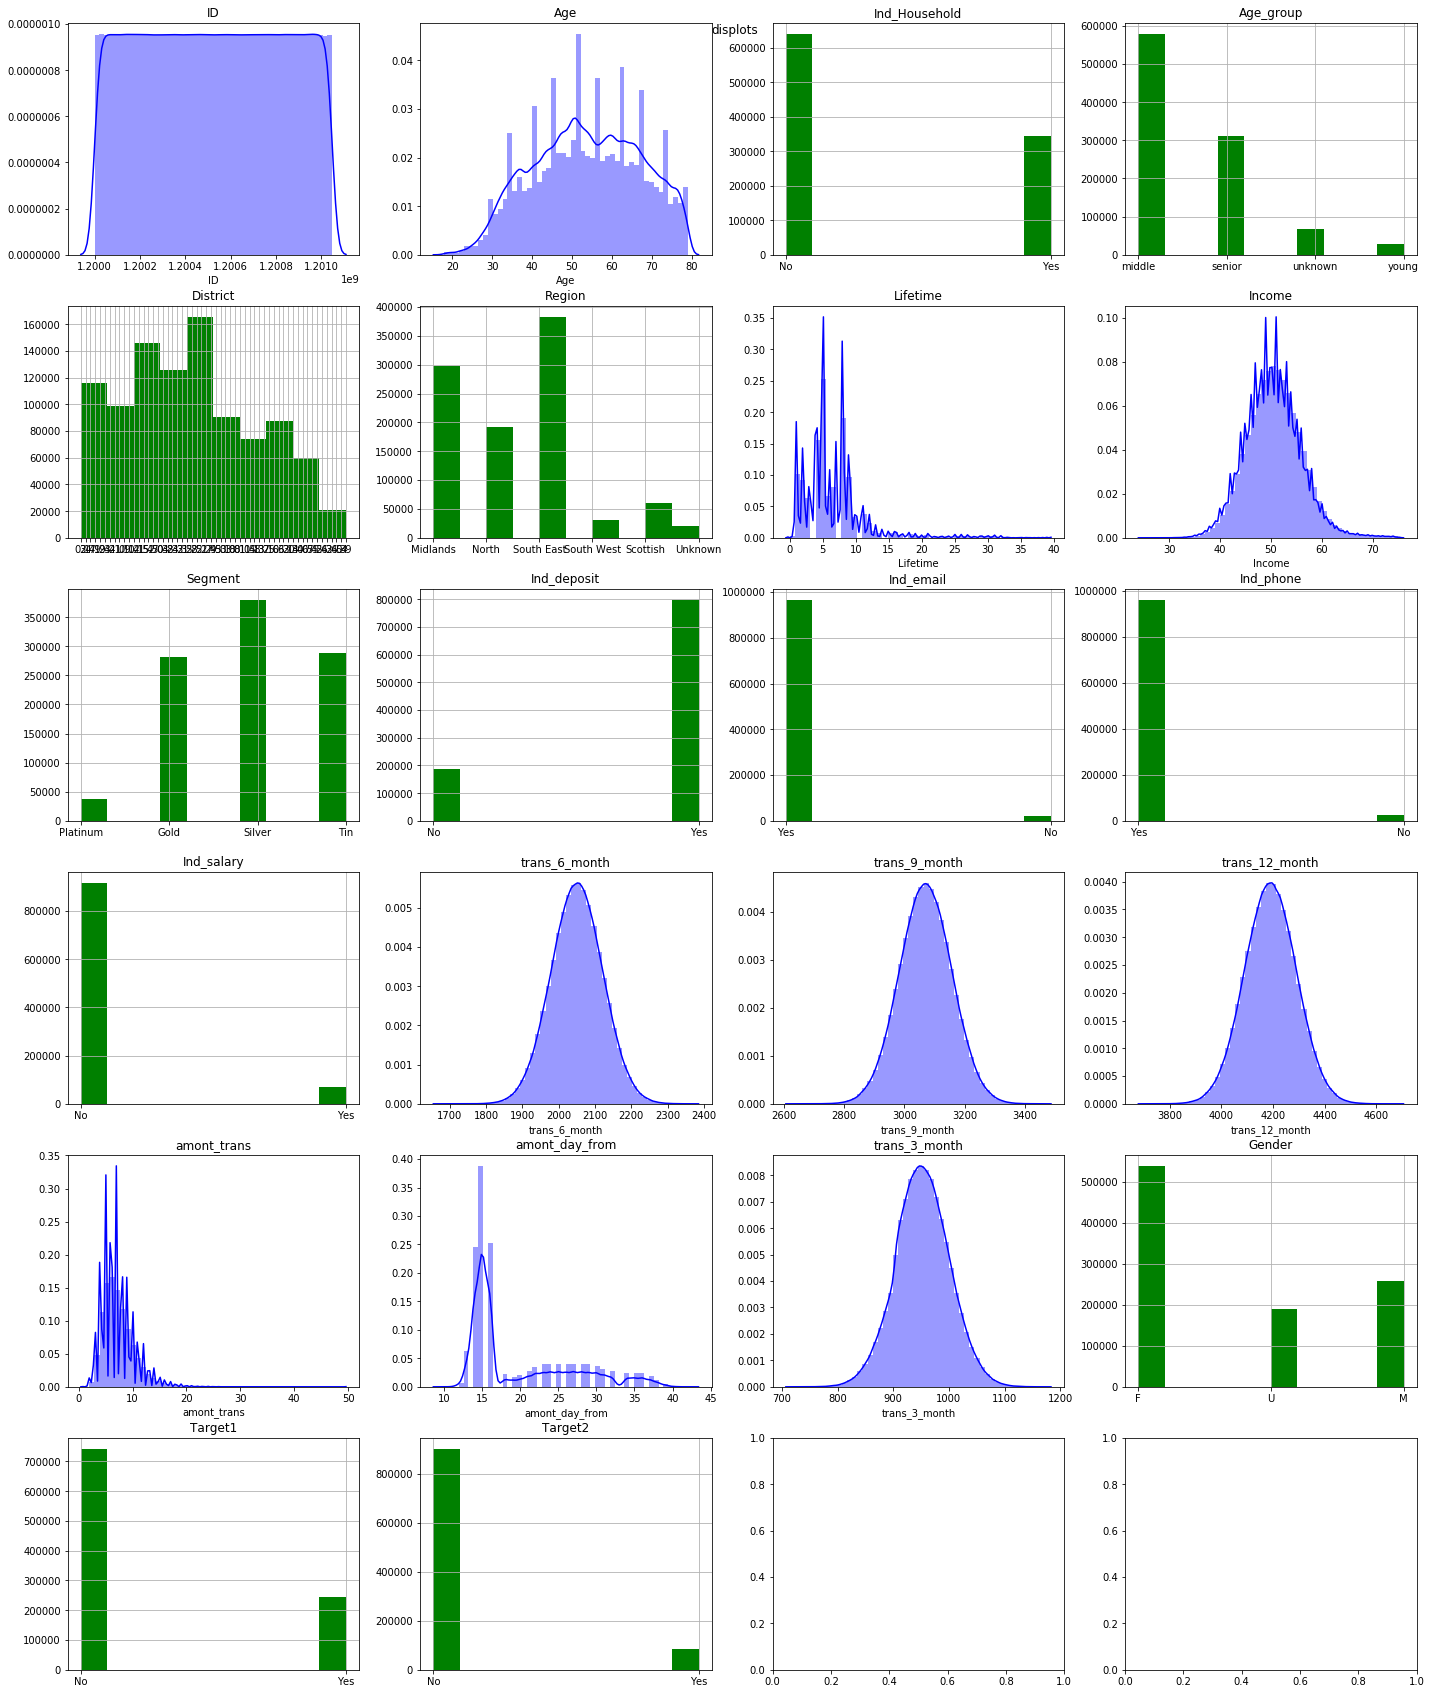

In [6]:
build_displots_without_nan(df_train, columns=df_train.columns, n_col=4, name='displots')

Проверяем возраст и заполняем пропущенные значения для возраста

In [7]:
for age_group in df_train['Age_group'].unique():
    print('group:', age_group)
    print('count:', df_train[df_train['Age_group'] == age_group].shape[0])
    print('nan: ', df_train[df_train['Age_group'] == age_group]['Age'].isna().sum(), ' (',
          round(df_train[df_train['Age_group'] == age_group]['Age'].isna().sum() / 
                df_train[df_train['Age_group'] == age_group].shape[0] * 100, 2), '%)', sep='')
    print('displot: ', df_train[df_train['Age_group'] == age_group]['Age'].min(), '-', 
          df_train[df_train['Age_group'] == age_group]['Age'].max())
    print('-' * 10)

group: middle
count: 578936
nan: 0 (0.0%)
displot:  31.0 - 60.0
----------
group: senior
count: 310393
nan: 0 (0.0%)
displot:  61.0 - 79.0
----------
group: unknown
count: 66958
nan: 66958 (100.0%)
displot:  nan - nan
----------
group: young
count: 29190
nan: 0 (0.0%)
displot:  18.0 - 30.0
----------


Непонятно, что делать с группой unknown, точнее какой возраст им указывать. Сейчас там везде nan, можно либо среднее (пропусков не так много), либо 0.

Lifetime можно попробовать заменить, через транзакции и количество транзакций. Но вообще я хз что такое колонки trans_12_month

Допускаем, что если не было транзакций с 12 до 9 месяца, то trans_9_month == trand_12_month

In [8]:
print('9-12: ', df_train[df_train['trans_12_month'] == df_train['trans_9_month']].shape[0])
print('6-9: ', df_train[df_train['trans_9_month'] == df_train['trans_6_month']].shape[0])
print('3-6: ', df_train[df_train['trans_6_month'] == df_train['trans_3_month']].shape[0])

9-12:  0
6-9:  0
3-6:  0


In [9]:
df_train['trans_1'] = df_train['trans_3_month']
df_train['trans_2'] = df_train['trans_6_month'] - df_train['trans_3_month']
df_train['trans_3'] = df_train['trans_9_month'] - df_train['trans_6_month']
df_train['trans_4'] = df_train['trans_12_month'] - df_train['trans_9_month']

In [10]:
print('1:', df_train[df_train['trans_1'] == 0.].shape[0])
print('2:', df_train[df_train['trans_2'] == 0.].shape[0])
print('3:', df_train[df_train['trans_3'] == 0.].shape[0])
print('4:', df_train[df_train['trans_4'] == 0.].shape[0])

1: 0
2: 0
3: 0
4: 0


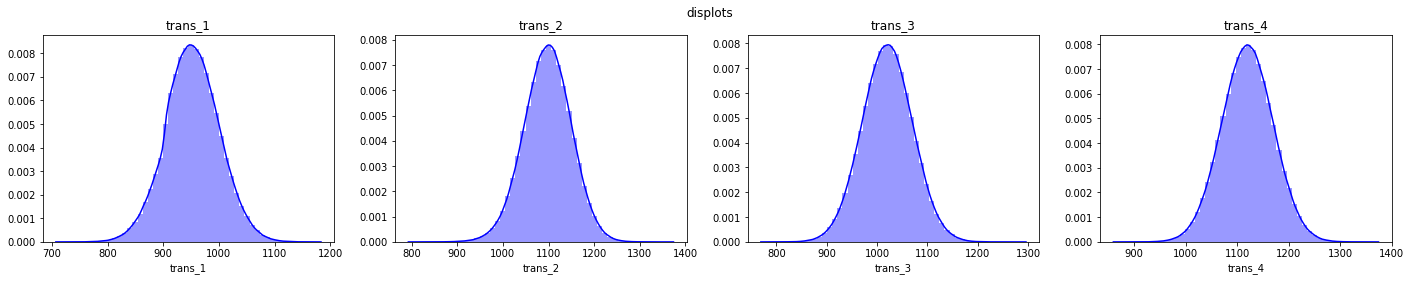

In [11]:
build_displots_without_nan(df_train, columns=['trans_1', 'trans_2', 'trans_3', 'trans_4'], n_col=4, name='displots')

In [12]:
print(df_train[df_train['Lifetime'] <= 3].shape[0])

196267


In [16]:
print(df_train[df_train['Lifetime'] == 1].shape[0])

76603


In [15]:
print(df_train[df_train['Lifetime'] == 0].shape[0])

2110


In [19]:
df_train[df_train['Lifetime'] == 0].head()

,ID,Age,Ind_Household,Age_group,District,Region,Lifetime,Income,Segment,Ind_deposit,Ind_email,Ind_phone,Ind_salary,trans_6_month,trans_9_month,trans_12_month,amont_trans,amont_day_from,trans_3_month,Gender,Target1,Target2,trans_1,trans_2,trans_3,trans_4
49,1200000053,56.000000,No,middle,23,South East,0.0,43,Gold,Yes,Yes,Yes,No,2045.39,3101.00,4110.80,8,15,922.70,F,No,No,922.70,1122.69,1055.61,1009.80
599,1200000633,53.792106,No,unknown,34,Midlands,0.0,55,Silver,Yes,Yes,Yes,No,2020.10,3037.85,4238.55,5,15,979.73,U,No,No,979.73,1040.37,1017.75,1200.70
633,1200000671,71.000000,No,senior,51,Midlands,0.0,52,Silver,Yes,Yes,Yes,No,1997.20,2936.78,4144.51,8,25,904.34,F,Yes,No,904.34,1092.86,939.58,1207.73
740,1200000787,79.000000,No,senior,14,South East,0.0,50,Platinum,Yes,Yes,Yes,No,2053.52,3104.17,4082.35,9,16,940.90,M,No,No,940.90,1112.62,1050.65,978.18
1174,1200001243,74.000000,No,senior,24,South East,0.0,60,Gold,Yes,Yes,Yes,No,2196.07,3157.63,4331.03,5,15,1027.36,F,No,No,1027.36,1168.71,961.56,1173.40


In [ ]:
df_train[df_train['Lifetime'] == 1].head()

In [20]:
df_train['Lifetime'].fillna(df_train['Lifetime'].mean(), inplace=True)

Надо проверить amount_day_from 

In [18]:
df_train['Age'].fillna(df_train['Age'].mean(), inplace=True)

### One-hot encoding

In [22]:
def do_one_hot_encoding(data, columns):
    for column in columns:
        tmp = pd.get_dummies(data[column], prefix=column)
        data = data.drop(columns=[column])
        data = data.join(tmp)
    return data

In [23]:
df_train = do_one_hot_encoding(df_train, columns=['Segment', 'Region', 'District', 'Age_group', 'Gender'])
df_train

,ID,Age,Ind_Household,Lifetime,Income,Ind_deposit,Ind_email,Ind_phone,Ind_salary,trans_6_month,trans_9_month,trans_12_month,amont_trans,amont_day_from,trans_3_month,Target1,Target2,Segment_Gold,Segment_Platinum,Segment_Silver,...,District_44,District_45,District_46,District_47,District_48,District_49,District_50,District_51,District_52,District_53,District_54,District_55,District_U,Age_group_middle,Age_group_senior,Age_group_unknown,Age_group_young,Gender_F,Gender_M,Gender_U
0,1200000001,51.0,No,3.0,53,No,Yes,Yes,No,2026.27,2964.23,4140.91,3,21,910.02,No,No,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,1200000002,47.0,No,2.0,51,No,Yes,Yes,No,2033.14,2969.30,4202.63,5,14,977.80,No,No,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,1200000003,45.0,No,6.0,50,No,Yes,Yes,No,2085.68,3080.13,4277.45,11,16,1001.54,No,No,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,1200000004,78.0,No,12.0,52,Yes,Yes,Yes,No,2026.58,3001.34,4105.54,3,15,980.78,No,No,0,1,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,1200000005,57.0,No,8.0,52,Yes,Yes,Yes,No,2142.23,3188.19,4401.98,2,26,1003.68,Yes,No,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985472,1201048571,NaN,No,6.0,42,Yes,Yes,Yes,No,2139.03,3155.41,4291.97,10,14,989.90,No,No,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
985473,1201048572,63.0,No,9.0,51,No,Yes,Yes,No,1916.91,3000.02,4045.15,11,30,884.63,No,No,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
985474,1201048573,68.0,No,3.0,56,Yes,Yes,Yes,No,2053.00,3112.87,4292.20,8,16,922.66,No,No,1,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
985475,1201048574,45.0,No,1.0,54,Yes,Yes,Yes,No,2082.85,3143.77,4207.48,8,15,951.42,No,No,1,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [24]:
def transformation_yes_no_to_1_0(data, columns):
    for column in columns:
        data[column] = 1 * (data[column] == 'Yes')
    return data

In [25]:
df_train = transformation_yes_no_to_1_0(df_train, columns=['Ind_deposit', 'Ind_email', 'Ind_phone', 
                                                           'Ind_salary', 'Target1', 'Target2', 'Ind_Household'])
df_train

,ID,Age,Ind_Household,Lifetime,Income,Ind_deposit,Ind_email,Ind_phone,Ind_salary,trans_6_month,trans_9_month,trans_12_month,amont_trans,amont_day_from,trans_3_month,Target1,Target2,Segment_Gold,Segment_Platinum,Segment_Silver,...,District_44,District_45,District_46,District_47,District_48,District_49,District_50,District_51,District_52,District_53,District_54,District_55,District_U,Age_group_middle,Age_group_senior,Age_group_unknown,Age_group_young,Gender_F,Gender_M,Gender_U
0,1200000001,51.0,0,3.0,53,0,1,1,0,2026.27,2964.23,4140.91,3,21,910.02,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,1200000002,47.0,0,2.0,51,0,1,1,0,2033.14,2969.30,4202.63,5,14,977.80,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,1200000003,45.0,0,6.0,50,0,1,1,0,2085.68,3080.13,4277.45,11,16,1001.54,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,1200000004,78.0,0,12.0,52,1,1,1,0,2026.58,3001.34,4105.54,3,15,980.78,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,1200000005,57.0,0,8.0,52,1,1,1,0,2142.23,3188.19,4401.98,2,26,1003.68,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985472,1201048571,NaN,0,6.0,42,1,1,1,0,2139.03,3155.41,4291.97,10,14,989.90,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
985473,1201048572,63.0,0,9.0,51,0,1,1,0,1916.91,3000.02,4045.15,11,30,884.63,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
985474,1201048573,68.0,0,3.0,56,1,1,1,0,2053.00,3112.87,4292.20,8,16,922.66,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
985475,1201048574,45.0,0,1.0,54,1,1,1,0,2082.85,3143.77,4207.48,8,15,951.42,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


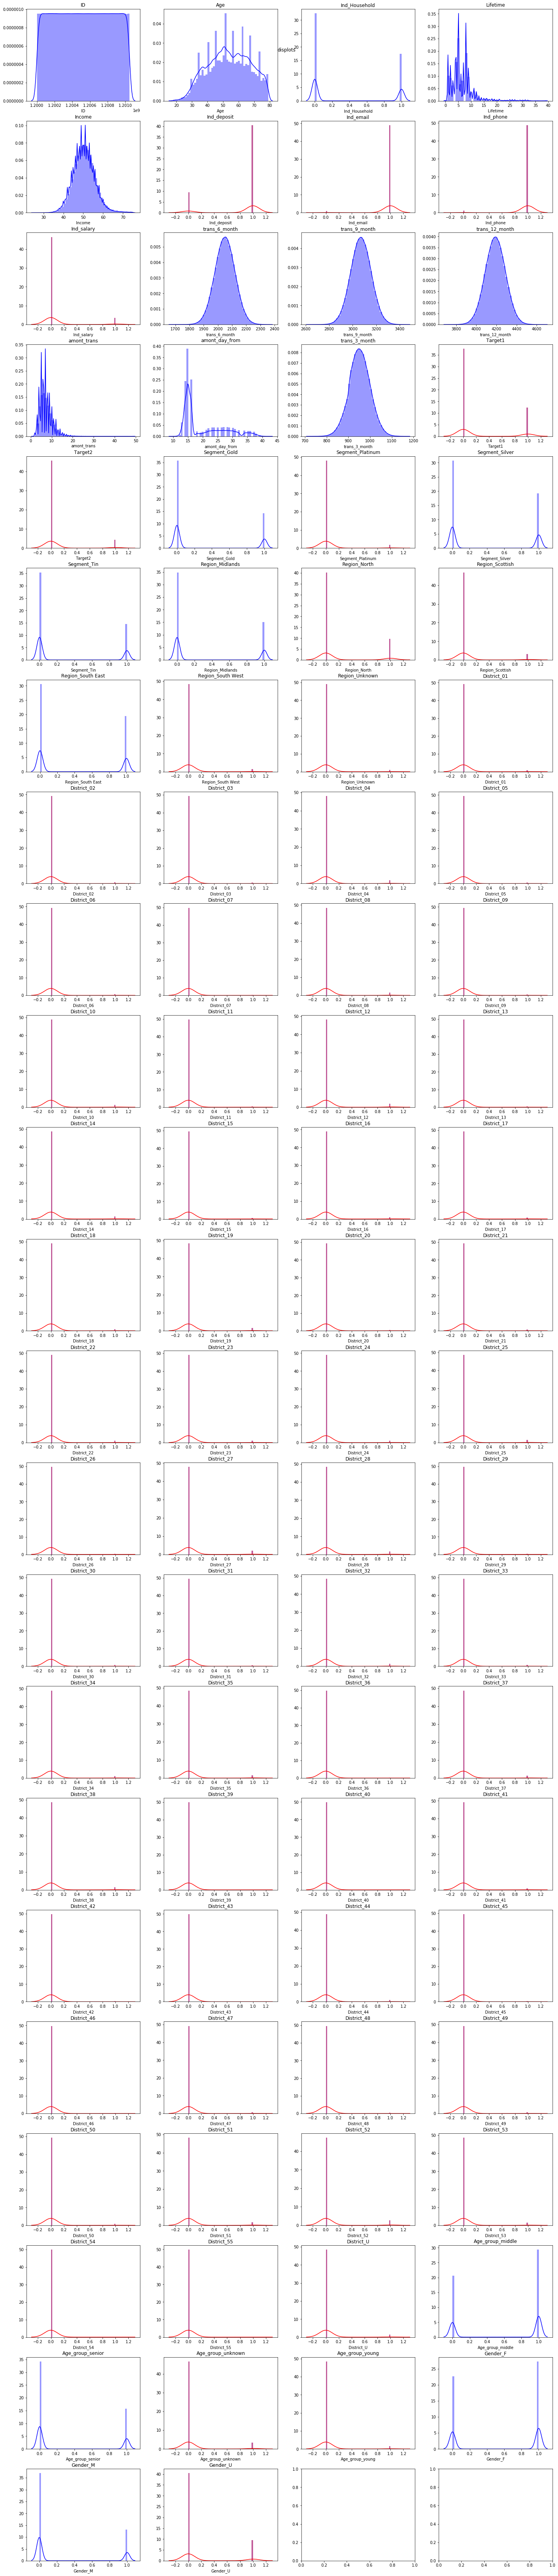

In [26]:
build_displots_without_nan(df_train, columns=df_train.columns, n_col=4, name='displots')

## Проверяем что для test

In [27]:
df_test.isna().sum()

ID                   0
Age               4369
Ind_House_hold       0
Age_group            0
District             0
Region               0
Lifetime           787
Income               0
Segment              0
Ind_deposit          0
Ind_salary           0
trans_6_month        0
trans_9_month        0
trans_12_month       0
amont_trans          0
amont_day_from       0
trans_3_month        0
Gender               0
dtype: int64

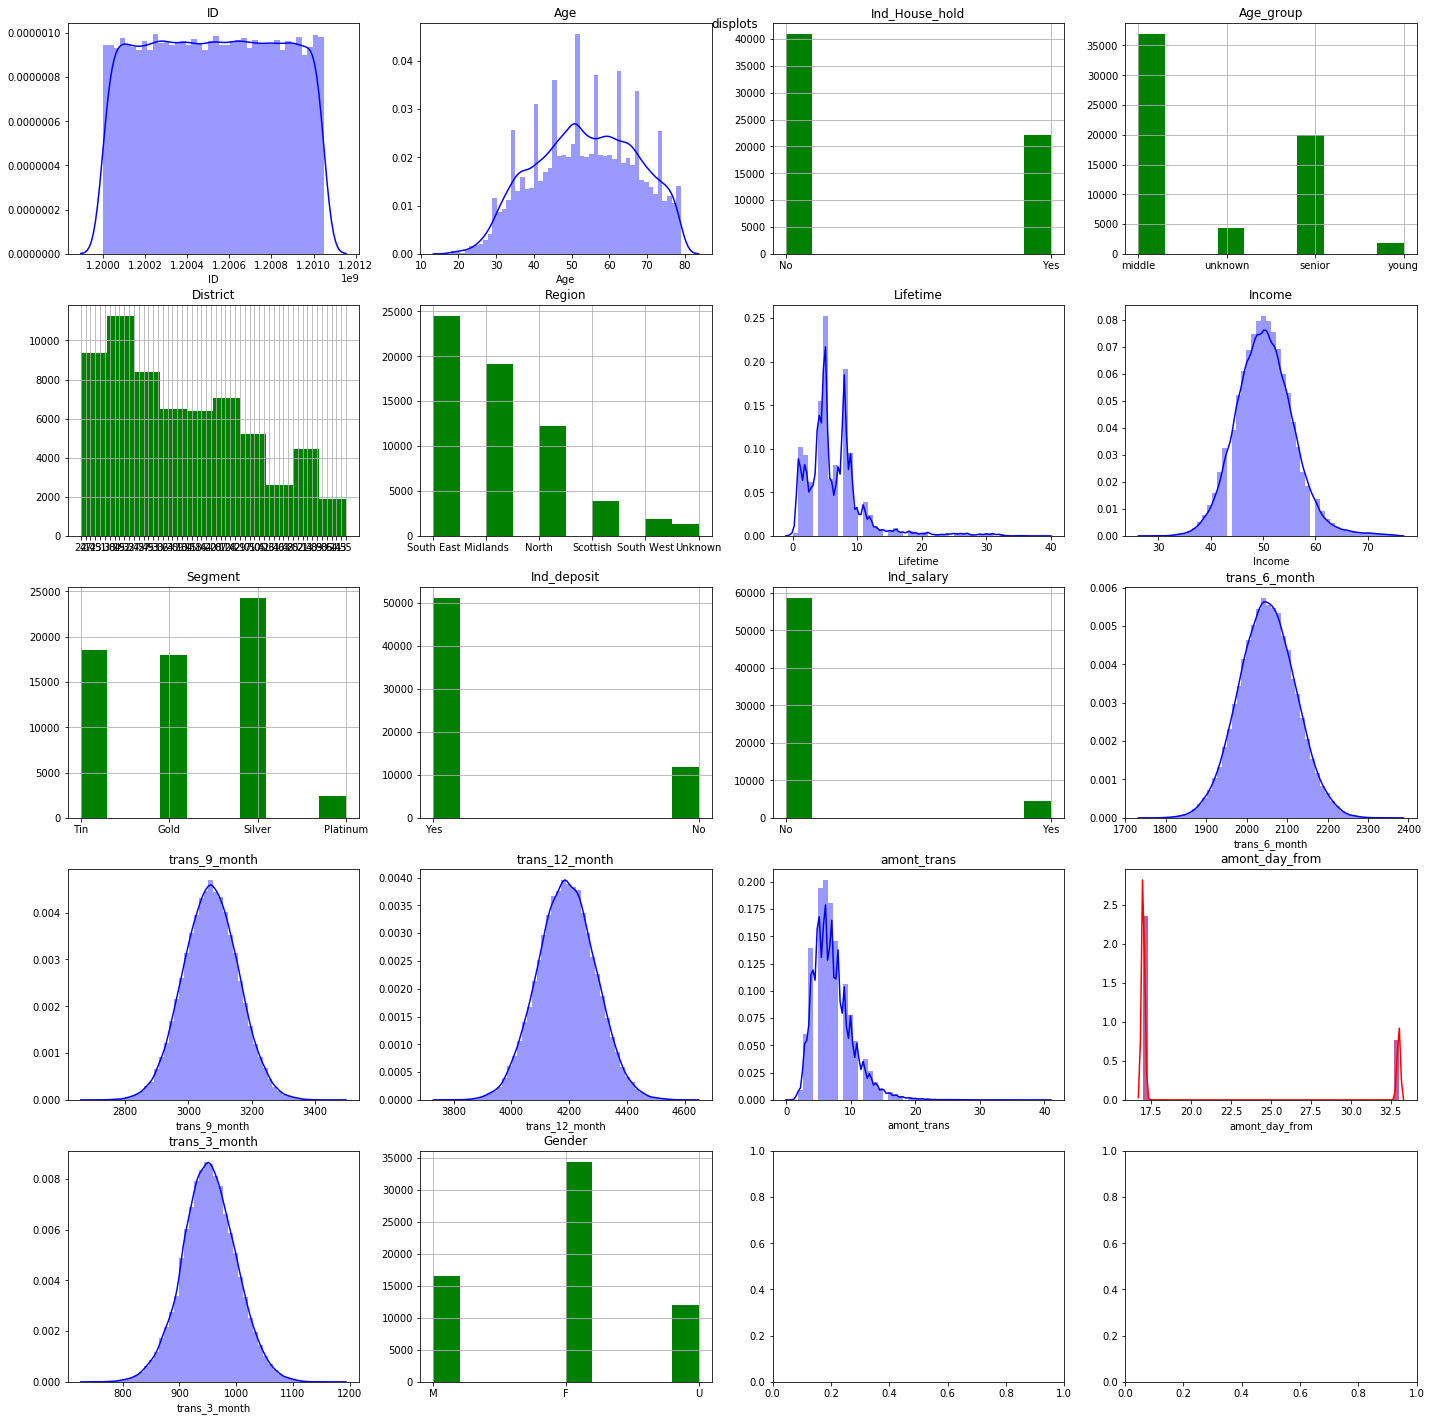

In [29]:
build_displots_without_nan(df_test, columns=df_test.columns, n_col=4, name='displots')

c amoun_day_from что-то не так

In [31]:
def do_one_hot_encoding(data, columns):
    for column in columns:
        tmp = pd.get_dummies(data[column], prefix=column)
        data = data.drop(columns=[column])
        data = data.join(tmp)
    return data

def transformation_yes_no_to_1_0(data, columns):
    for column in columns:
        data[column] = 1 * (data[column] == 'Yes')
    return data

def prepare_data(df, is_train=True):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Lifetime'].fillna(df['Lifetime'].mean(), inplace=True)
    
    columns_to_delete = [
        'Ind_Household',
        'Ind_email',
        'Ind_phone'
    ]
    
    columns_to_label_encoding = [
        'Ind_deposit',                
        'Ind_salary'
    ]

    if is_train:
        df.drop(columns=columns_to_delete, inplace=True)
        columns_to_label_encoding += ['Target1', 'Target2']

    df = transformation_yes_no_to_1_0(df, columns=columns_to_label_encoding)
    
    columns_to_one_hot_encoding = [
        'Segment', 
        'Region', 
        'District', 
        'Age_group', 
        'Gender'
    ]
    
    df = do_one_hot_encoding(df, columns=columns_to_one_hot_encoding)
    
    return df

In [32]:
df_train = prepare_data(df_train)
df_train

,ID,Age,Lifetime,Income,Ind_deposit,Ind_salary,trans_6_month,trans_9_month,trans_12_month,amont_trans,amont_day_from,trans_3_month,Target1,Target2,Segment_Gold,Segment_Platinum,Segment_Silver,Segment_Tin,Region_Midlands,Region_North,...,District_44,District_45,District_46,District_47,District_48,District_49,District_50,District_51,District_52,District_53,District_54,District_55,District_U,Age_group_middle,Age_group_senior,Age_group_unknown,Age_group_young,Gender_F,Gender_M,Gender_U
0,1200000001,51.000000,3.0,53,0,0,2026.27,2964.23,4140.91,3,21,910.02,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,1200000002,47.000000,2.0,51,0,0,2033.14,2969.30,4202.63,5,14,977.80,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,1200000003,45.000000,6.0,50,0,0,2085.68,3080.13,4277.45,11,16,1001.54,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,1200000004,78.000000,12.0,52,1,0,2026.58,3001.34,4105.54,3,15,980.78,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,1200000005,57.000000,8.0,52,1,0,2142.23,3188.19,4401.98,2,26,1003.68,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985472,1201048571,53.792106,6.0,42,1,0,2139.03,3155.41,4291.97,10,14,989.90,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
985473,1201048572,63.000000,9.0,51,0,0,1916.91,3000.02,4045.15,11,30,884.63,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
985474,1201048573,68.000000,3.0,56,1,0,2053.00,3112.87,4292.20,8,16,922.66,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
985475,1201048574,45.000000,1.0,54,1,0,2082.85,3143.77,4207.48,8,15,951.42,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [33]:
df_test = prepare_data(df_test, is_train=False)
df_test

,ID,Age,Ind_House_hold,Lifetime,Income,Ind_deposit,Ind_salary,trans_6_month,trans_9_month,trans_12_month,amont_trans,amont_day_from,trans_3_month,Segment_Gold,Segment_Platinum,Segment_Silver,Segment_Tin,Region_Midlands,Region_North,Region_Scottish,...,District_44,District_45,District_46,District_47,District_48,District_49,District_50,District_51,District_52,District_53,District_54,District_55,District_U,Age_group_middle,Age_group_senior,Age_group_unknown,Age_group_young,Gender_F,Gender_M,Gender_U
0,1200000027,50.000000,No,5.0,47,1,0,2062.32,2978.92,4054.13,7,17,950.45,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,1200000040,34.000000,No,5.0,54,0,0,2000.73,3111.23,4265.02,5,17,982.29,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,1200000041,53.804134,Yes,28.0,52,1,0,1991.05,2990.26,4193.14,9,33,909.27,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,1200000071,61.000000,No,3.0,54,1,0,2094.12,3089.97,4167.11,5,17,933.91,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,1200000080,44.000000,No,8.0,43,1,0,2034.41,2972.27,4165.87,5,17,917.13,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63093,1201048525,67.000000,Yes,1.0,48,1,0,2037.32,3084.48,4236.37,12,33,904.46,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
63094,1201048529,75.000000,No,9.0,46,1,0,2048.42,3072.78,4203.52,7,17,1026.79,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
63095,1201048544,54.000000,No,2.0,53,1,0,2120.81,3167.97,4343.64,16,17,1017.48,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
63096,1201048557,41.000000,Yes,13.0,44,1,0,2133.01,3201.82,4284.59,12,17,979.36,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
